Write a program to numerically evaluate the derivative of f(x)=cos x at an arbitrary position x.

1. Evaluate the derivative at position x using the forward difference scheme. Plot log(Error)=log10|f’(numerically)-f’(analytic)| against log10(dx) for dx=1e-16,1e-15,….,0.1 at x=π/4. You should find Error~
; what is n? what is the optimal value for dx.


2. Repeat the exercise using the central difference scheme. Why this scheme is better?


3. Repeat (2) for x=0. Why do the results differ? (hint: write out the error term derived in the class explicitly by plugging the derivative of cos or sin)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import typing

# Problems 1 and 2

In [2]:
#=======================================================
# Computes the derivative of a function using the
# forward difference method
# Parameters:
# - y  - The function to be differentiated
# - x  - The point to evaluate the derivative
# - dx - The step size for computation
# Returns:
# - The derivative of y evaluated at x
#=======================================================
def forward_difference(y,x,dx):
    return (y(x+dx)-y(x))/dx

#=======================================================
# Computes the derivative of a function using the
# central difference method
# Parameters:
# - y  - The function to be differentiated
# - x  - The point to evaluate the derivative
# - dx - The step size for computation
# Returns:
# - The derivative of y evaluated at x
#=======================================================
def central_difference(y,x,dx):
    return (y(x+dx/2)-y(x-dx/2))/dx


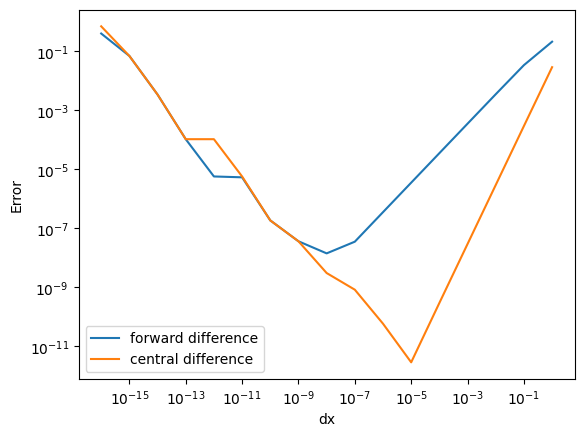

In [3]:
# Defining the analytic solution for the derivative of sin(x)
analytic_solution = lambda x : -np.sin(x)

# populate the lists
x=np.pi/4
dX = [10**i for i in range(-16, 1)]
Y1 = [abs(forward_difference(np.cos, x, dx) - analytic_solution(x)) for dx in dX]
Y2 = [abs(central_difference(np.cos, x, dx) - analytic_solution(x)) for dx in dX]

# plotting
plt.plot(dX, Y1, label="forward difference")  
plt.plot(dX, Y2, label="central difference")
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('dx')
plt.ylabel('Error')
plt.show()

The central difference scheme is better because we can achieve a smaller or equal error with the same step size. Also, for solving when the runtime is effected by step size, we can achieve the samme accuracy in a shorter time.

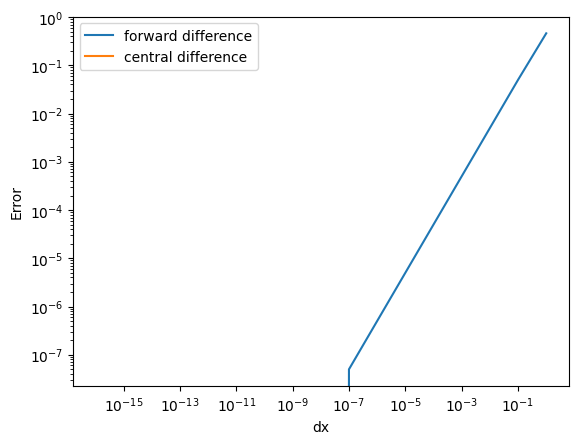

In [4]:
x=0.0
dX = [10**i for i in range(-16, 1)]
Y1 = [abs(forward_difference(np.cos, x, dx) - analytic_solution(x)) for dx in dX]
Y2 = [abs(central_difference(np.cos, x, dx) - analytic_solution(x)) for dx in dX]

# plotting
plt.plot(dX, Y1, label="forward difference")  
plt.plot(dX, Y2, label="central difference")
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('dx')
plt.ylabel('Error')
plt.show()

This plot is difficult to read because the plot drops down toward negative infinity, so let's take a look at the non-log plot

# Problem 3

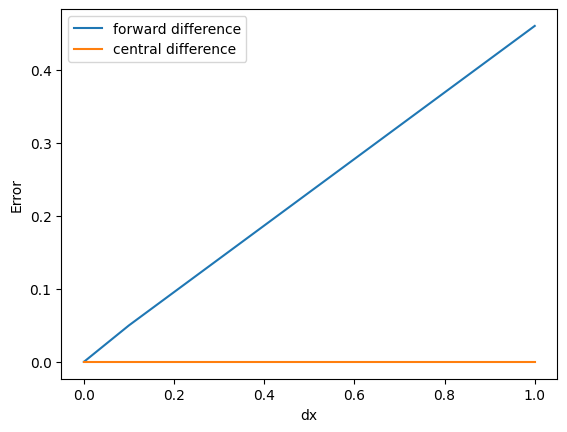

In [5]:
plt.plot(dX, Y1, label="forward difference")  
plt.plot(dX, Y2, label="central difference")
plt.legend()
plt.xlabel('dx')
plt.ylabel('Error')

plt.show()

We see that the errors for both methods go to 0 as dx goes to 0. This makes sense because at x=0, the derivative goes to 0. The forward and central difference schemes will both go to zero as dx gets very small, therefore, as dx goes below a certain threshold, the error begins to rise as the difference schemes go to zero while the analytic solution does not. But, for the case of x = 0, the difference scheme going to zero decreases the error.

The central difference having no error comes from the fact that the error term is proportional to the second derivative. $y''(x) =$ cos($x$). Because cos is symmetrix around $x$ = 0, we can see that cos(x + h/2) = cos(x - h/2); therefore, the central difference will always yield zero, which is exactly the analytic solution.